<a href="https://colab.research.google.com/github/tren03/ML-Mini-Projects/blob/main/Pytorch/Pytorch_module_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Neural Network Classification


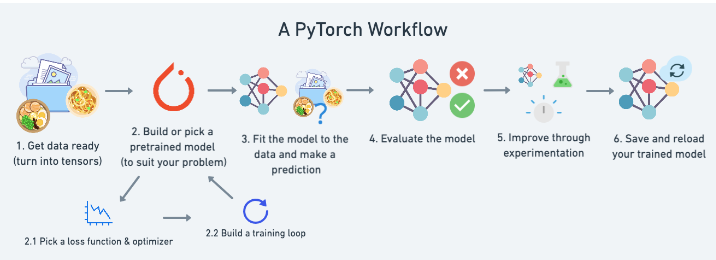

workflow

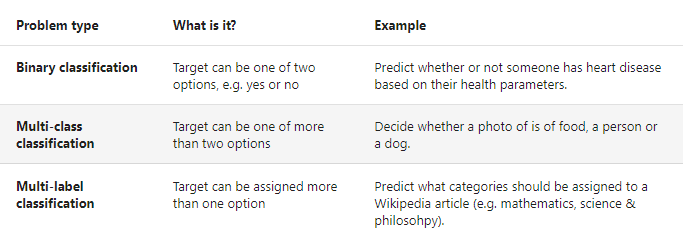

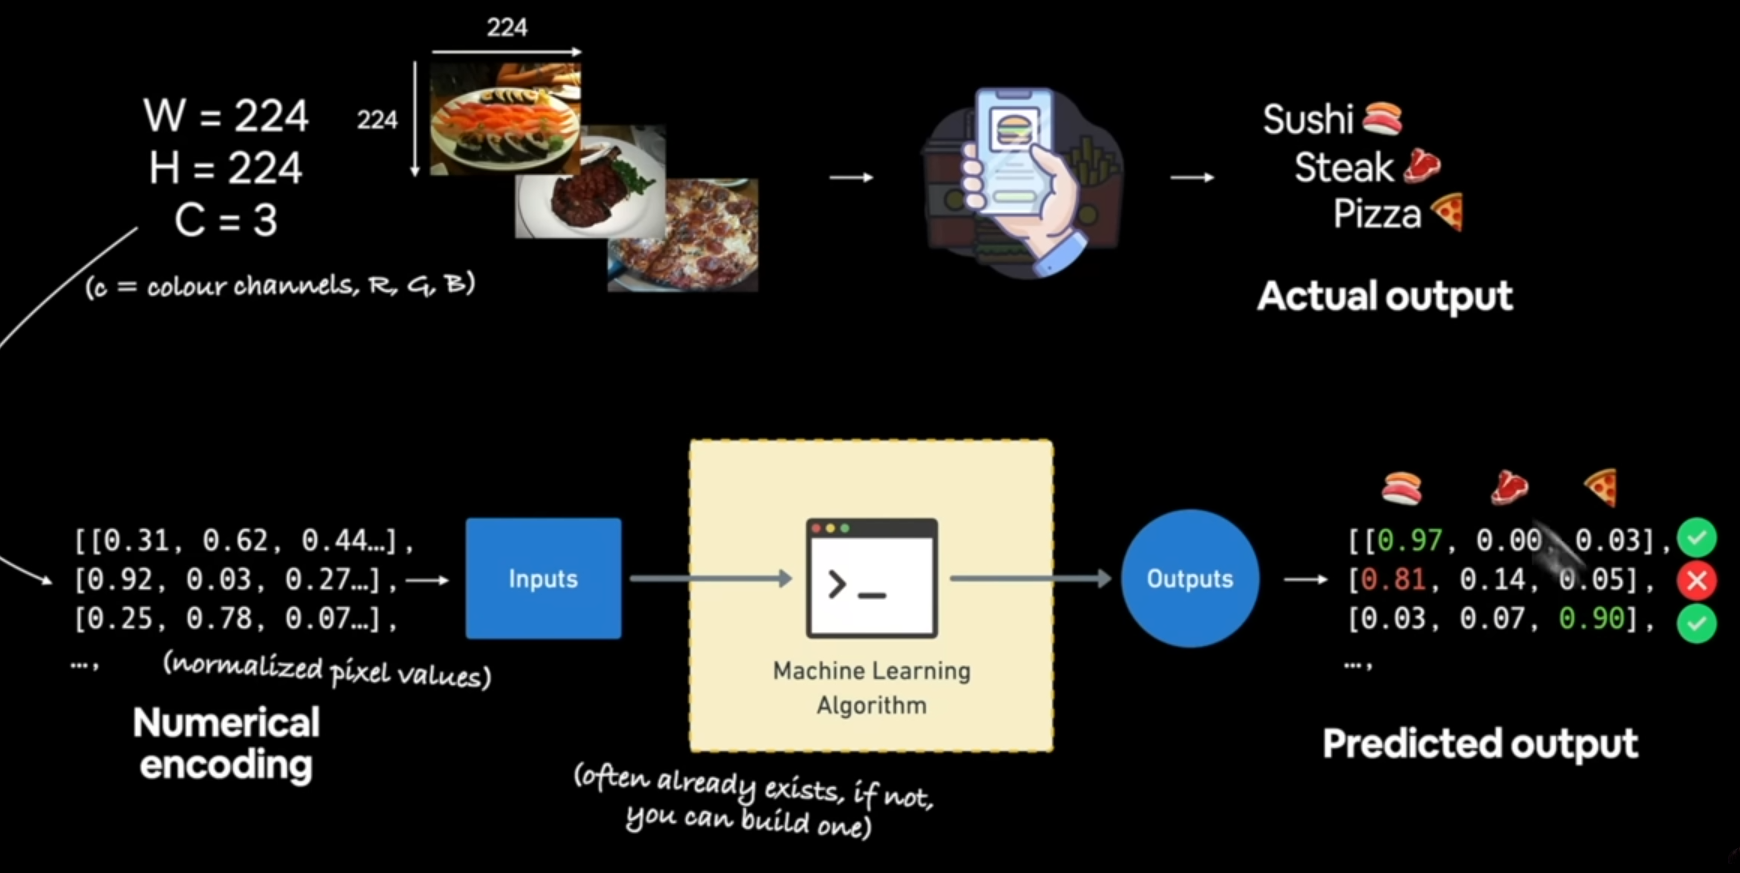

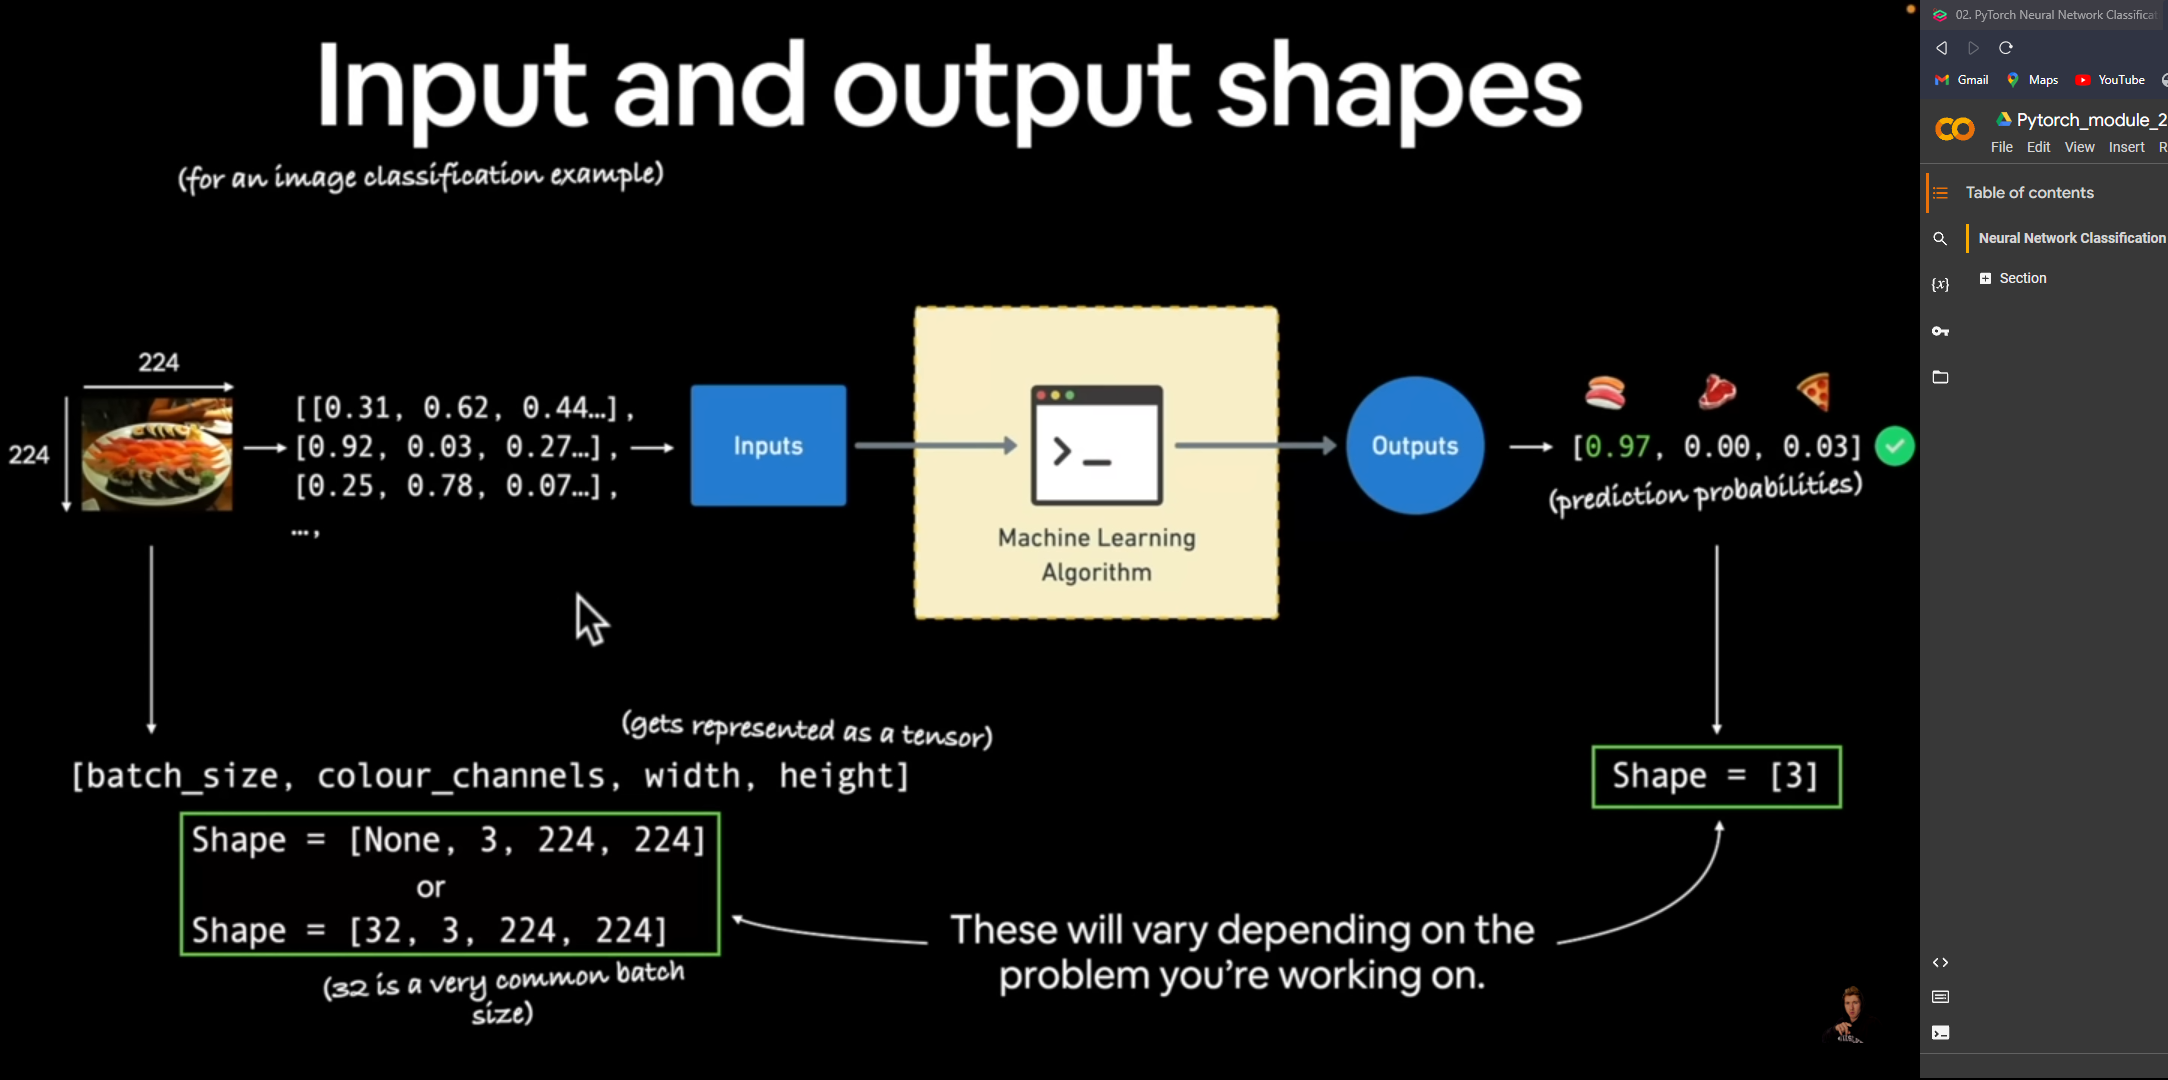

[Course Material Reference](https://www.learnpytorch.io/02_pytorch_classification/)

###Architecture of a classification model

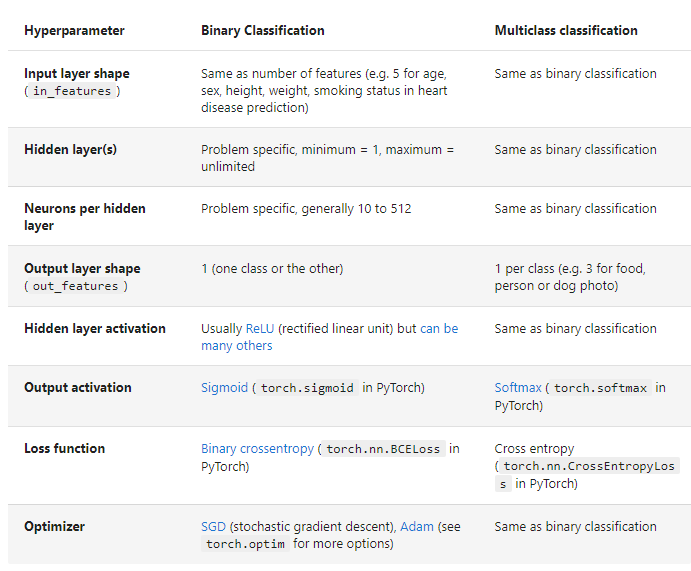



##Getting data ready

In [ ]:
from sklearn.datasets import make_circles

#Make 1000 samples
n_samples = 1000

#Create circles
X,y = make_circles(n_samples,noise=0.03,random_state=42)

X[:5],y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [ ]:
#Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1 ":X[:,0],
                        "X2 ":X[:,1],
                       "label":y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


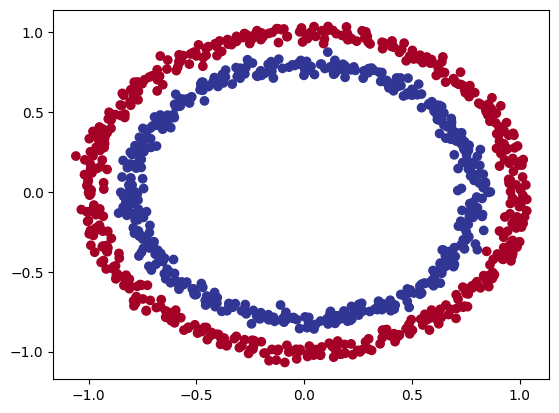

In [ ]:
#Visualize the data
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],y=X[:,1],c=y,cmap=plt.cm.RdYlBu)

Note : data we are working with called toy dataset, small dataset to practice ML

###Checking input and output shapes

In [ ]:
X.shape,y.shape

((1000, 2), (1000,))

In [ ]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


##Test and Training split and turning data to tensors

In [ ]:
#turning data into tensors
import torch
from torch import nn
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [ ]:
# training_split = int(0.8*len(X))
# X_train = X[:training_split][:]
# y_train = y[:training_split]
# X_test = X[training_split:][:]
# y_test = y[training_split:]

from sklearn.model_selection import train_test_split #splits data randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) #random state is similar to torch.manual_seed() but for sklearn

X_train.shape,y_train.shape


(torch.Size([800, 2]), torch.Size([800]))

##Building a model

build a model to classify if point is of inner or outer circle
1. Setting up device agnostic code (so our model can run on CPU or GPU if it's available).
2. Constructing a model by subclassing nn.Module.
3. Defining a loss function and optimizer.
4. Creating a training loop (this'll be in the next section).


In [ ]:
import torch
from torch import nn

#Make device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

1. Subclasses nn.Module (almost all PyTorch models are subclasses of nn.Module).
2. Creates 2 nn.Linear layers in the constructor capable of handling the input and output shapes of X and y.
3. Defines a forward() method containing the forward pass computation of the model.
4.
Instantiates the model class and sends it to the target device.

In [ ]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features=5) # takes in 2 features (X), produces 5 features
    self.layer_2 = nn.Linear(in_features = 5, out_features = 1)  # takes in 5 features, produces 1 feature (y)

  #Define a forward method containing the forward pass computation
  def forward(self,x):
    return self.layer_2(self.layer_1(x)) # computation goes through layer_1 first then the output of layer_1 goes through layer_2

model_0 = CircleModelV0().to(device)

In [ ]:
device
next(model_0.parameters()).device


1. model_0.parameters() returns an iterator over all the parameters (weights and biases) in model_0.
2. next(...) is used to get the first element from that iterator.
3. .device is then used to retrieve the device information for that particular parameter.

In [ ]:
#We could also make the model like this
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
    ).to(device)


  #Define a forward method containing the forward pass computation
  def forward(self,x):
    return self.layer_2(self.layer_1(x)) # computation goes through layer_1 first then the output of layer_1 goes through layer_2

model_0 = CircleModelV0().to(device)

model_0


In [ ]:
# Replicate CircleModelV0 with nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0.state_dict()
#all these parameters set by pytorch automatically.


 When you have two input features connected to five neurons in a layer, and the activation function is linear, the computation in each neuron can be expressed as a linear transformation of the input features.
 ex
 for the first neuron - y = w1*x1 + w2*x2 + b

In [ ]:
# Make predictions with the model
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
  print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
  print(f"Length of test samples: {len(y_test)}, Shape: {X_test.shape}")
  print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
  print(f"\nFirst 10 test labels:\n{y_test[:10]}")

In [ ]:
untrained_preds[:10]
#since our y_test is either 0 or 1, we need to make the predictions in the form 0 or 1

###2.1 Setting up Loss func and optimizer

In [ ]:
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in, inputs need to go through sigmoid function before going to loss function of bce loss
loss_fn = nn.BCEWithLogitsLoss() #sigmoid activation function built in
#explore logit loss bce
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [ ]:
#Calculating accuracy : percentage our model gets right
def accuracy(y_true,y_preds):
  correct = torch.eq(y_true,y_preds).sum().item()
  acc = (correct/len(y_preds))*100
  return acc

1. **'correct'** tensor will have 1s at positions where the elements in y_true and y_preds are equal and 0s where they are not equal.
2. .sum() to count the number of elements that are equal.
3. Using .item() is necessary if you want to extract the actual Python number from a tensor that contains a single element (a scalar). When you apply .sum() to the tensor resulting from torch.eq(y_true, y_preds), you get a tensor with a single element, and if you want to use that number in Python code (e.g., for printing or further calculations), you use .item().

## Going from raw logits -> prediction probabilities -> prediciton labels

Logits are the raw scores or unnormalized values that are obtained from the output layer of a neural network before applying the softmax activation function.

Our ouput model is going to provide Logits
We can convert logits to probabilities by passing them into some kind of activation function(ex - sigmoid or softmax)

Then we can convert our model prediction probabilities to prediction labels by rounding them or using argmax()(argmax used with softmax)

In [ ]:
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))

y_logits[:5]

In [ ]:
#using sigmoid on logits
y_pred_probs = torch.sigmoid(y_logits) #maps any value between 0 and 1
y_pred_probs[:5]

In [ ]:
torch.round(y_pred_probs[:5])

for prediciton probability values
1. y >= 0.5 -> class 1(y=1)
2. y < 0.5 -> class 0(y=0)


In [ ]:
#Finding predicted labels
y_preds = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))
print(torch.eq(y_preds.squeeze(),y_preds.squeeze()))


# Train and test loops
Training loop
1. forward pass
2. calculate loss
3. optimizer zero grad
4. loss backward
5. optimizer step


In [ ]:
torch.manual_seed(42)
